## Perceived Labor Income Risks and Asset Returns

- This notebook first downloads asset return indicators 
- Then we examine the correlation of higher moments of labor income risks and asset returns 

In [93]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

###  1. Download stock return series 

In [94]:
## s&p 500 series 

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2019, 10, 30)

In [95]:
## downloading the data from Fred
sp500D= web.DataReader('sp500', 'fred', start, end)

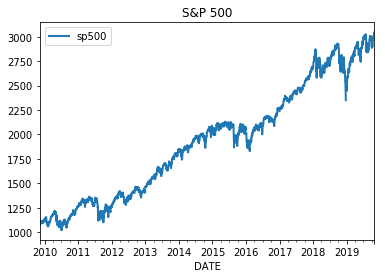

In [96]:
#plotting
sp500D.plot(lw=2)
sp500plt = plt.title('S&P 500')

In [97]:
sp500D.index = pd.to_datetime(sp500D.index)
sp500M = sp500D.resample('M').last()

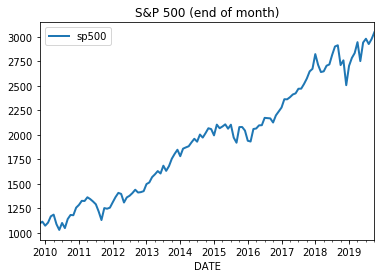

In [98]:
sp500M.plot(lw=2)
sp500Mplt = plt.title('S&P 500 (end of month)')

In [99]:
sp500MR = np.log(sp500M).diff()*100

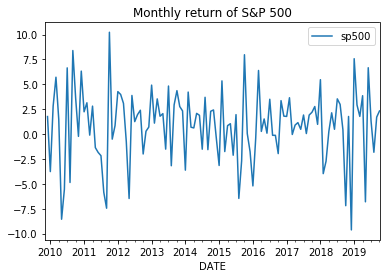

In [100]:
sp500MR.plot()
sp500MRplt = plt.title('Monthly return of S&P 500')

###  2. Loading and cleaning perceived income series 

In [122]:
SCEProbIndM = pd.read_stata('../SurveyData/SCE/IncExpSCEProbIndM.dta')

In [123]:
sub_var = ['date','userid','Q24_var','Q24_mean','Q24_iqr']

## subselect the dataframe
IncSCEIndMoms = SCEProbIndM[sub_var]
## drop nan observations
#IncSCEIndMoms = IncSCEIndMoms.dropna(how='any')

In [124]:
## population summary stats 
IncSCEPopMomsMed = IncSCEIndMoms.groupby('date').median().drop(columns=['userid'])
IncSCEPopMomsMean = IncSCEIndMoms.groupby('date').mean().drop(columns=['userid'])

In [ ]:
IncSCEPopMomsMed.asfreq(freq='ms')

In [121]:
sp500MR.index

DatetimeIndex(['2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28',
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31',
               ...
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', name='DATE', length=120, freq='M')

In [106]:
IncSCEIndMoms.index

Int64Index([    2,     7,     9,    15,    16,    17,    18,    23,    24,
               25,
            ...
            79045, 79046, 79047, 79048, 79049, 79050, 79053, 79056, 79059,
            79062],
           dtype='int64', length=43249)

### 3. Combinine the two series 

In [79]:
dt_combM = pd.concat([sp500MR,IncSCEPopMomsMed],join="inner",axis=1)